# AAI-501-02-SU23 - Final Project Proposal Team 1
### Paul Parks, Lishi Wang, Ivan Steklov
### University of San Diego
### AAI-501-02-SU23 - Introduction to AI
### Ying Lin
### July 17, 2023

## Imports

In [158]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from wordcloud import WordCloud
import re


## Dataset

In [159]:
df = pd.read_csv('../Dataset/McDonald_s_Reviews.csv', encoding='latin-1', index_col='reviewer_id')
df.head()

,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
reviewer_id,,,,,,,,,
1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


## Cleaning

In [160]:
df['rating_int'] = df['rating'].apply(lambda x: int(x.split(' ')[0]))
df.head()

,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,rating_int
reviewer_id,,,,,,,,,,
1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,1
2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,4
3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star,1
4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,5
5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star,1


In [161]:
chars_to_replace = ['½ï', 'ï', '½', '¿']

# Replace unwanted characters in the 'review' column
for char in chars_to_replace:
    df['review'] = df['review'].str.replace(char, '')
    df['store_address'] = df['store_address'].str.replace(char, '')


In [162]:
def get_state_from_address(address):
    state_match = re.search(r'\b[A-Z]{2}\b\s\d{5}', address)
    return state_match.group(0).split()[0] if state_match else 'Unknown'

df['state'] = df['store_address'].apply(get_state_from_address)
# df['state'].describe()
# df['state'].head()
df['state'].nunique()
# unique_states = df[['state']].drop_duplicates()
# print(unique_states)

# Investigate the blank states
# rows_with_blank_state = df[df['state'] == '']
# print(rows_with_blank_state["store_address"])

12

## Data Analysis

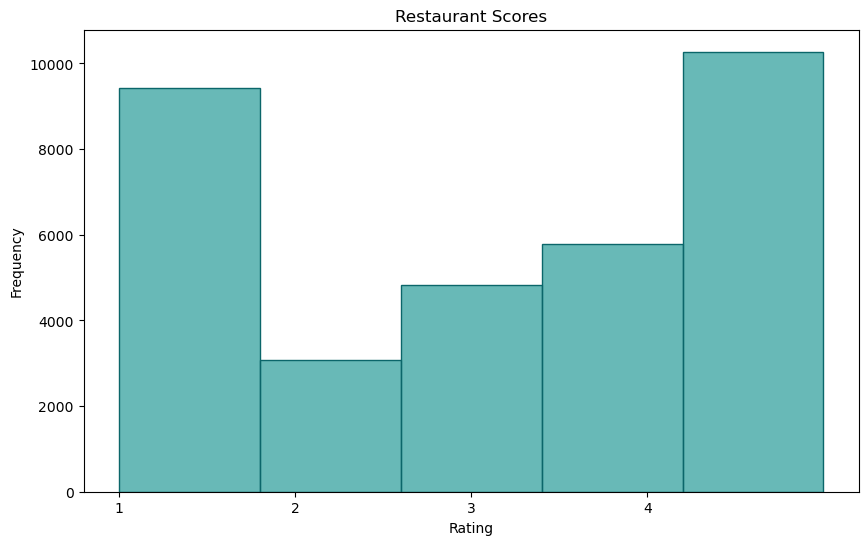

In [163]:
sorted_data = df.sort_values('rating_int')

# Set the color palette
sns.set_palette(sns.color_palette(["#35A29F"]))

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df, x='rating_int', bins=5, edgecolor="#0B666A", linewidth=1)

# Customize the plot
plt.title("Restaurant Scores")
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1,5))
plt.show()

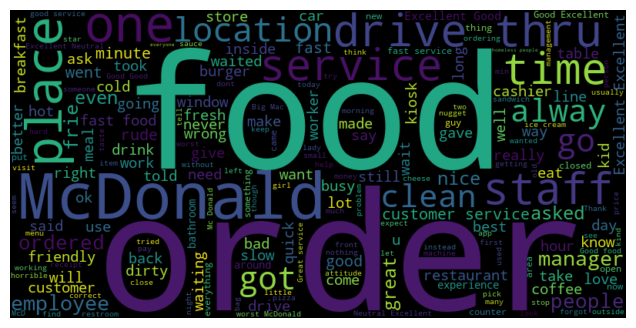

dict_keys(['order', 'food', 'McDonald', 'place', 'one', 'drive thru', 'staff', 'time', 'service', 'location', 'got', 'go', 'alway', 'clean', 'employee', 'manager', 'people', 'ordered', 'frie', 'even', 'great', 'asked', 'nice', 'customer service', 'went', 'good', 'minute', 'rude', 'fast', 'drive', 'take', 'line', 'eat', 'said', 'never', 'need', 'work', 'friendly', 'will', 'Excellent Excellent', 'wait', 'fast food', 'make', 'know', 'coffee', 'give', 'told', 'burger', 'u', 'restaurant', 'say', 'way', 'come', 'bad', 'really', 'love', 'cold', 'drink', 'inside', 'busy', 'took', 'want', 'fresh', 'slow', 'kid', 'hot', 'still', 'back', 'hour', 'window', 'ask', 'table', 'right', 'day', 'well', 'waiting', 'customer', 'meal', 'breakfast', 'gave', 'made', 'wrong', 'best', 'store', 'lot', 'use', 'kiosk', 'long', 'worker', 'going', 'cashier', 'dirty', 'quick', 'waited', 'better', 'ok', 'car', 'Excellent Good', 'experience', 'around', 'bathroom', 'Good Excellent', 'area', 'came', 'thing', 'fast servic

In [164]:
text_data = ' '.join(df['review'])

wordcloud = WordCloud(width=800, height=400).generate(text_data)

plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

print(wordcloud.words_.keys())


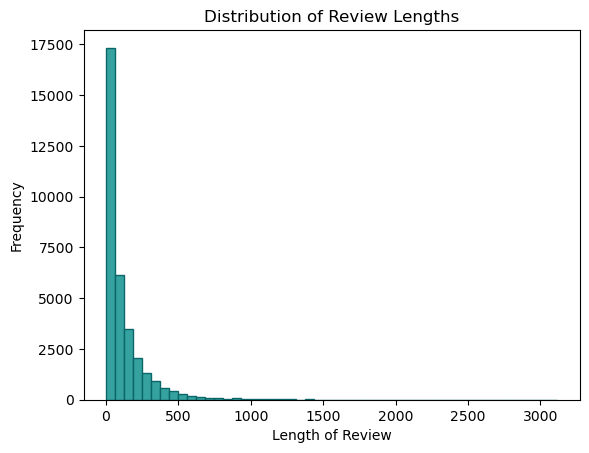

In [165]:
reviews = df['review']

df['review_length'] = reviews.apply(len)

plt.hist(df['review_length'], bins=50, color="#35A29F", edgecolor="#0B666A")
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.show()


In [166]:
df['review_length'] = df['review'].apply(len)

# Find the maximum length
max_length = df['review_length'].max()

# Retrieve the review(s) with the maximum length
max_length_reviews = df[df['review_length'] == max_length]['review']

# Print the maximum length and the corresponding review(s)
print(f"Maximum Review Length: {max_length}")
for review in max_length_reviews:
    print(f"Review: {review}")


Maximum Review Length: 3115
Review: I want to apologize to anyone that I recommended this particular McDonald's to in the past.
This was the restaurant that I used to recommend to tourists when they were looking for a fast place to eat that was away from the Disney parks, but still close enough to get back to the parks quickly. At that time, it was worth it. The menu was cheap (or at least what you know to expect from a international chain) and, since it's a chain, you know what the food is gong to be like.
So, let's look at what you need to do if you are a member of a chain of restaurants. You need to set yourself apart with your service. This WAS the reason I used to recommend this restaurant. Sadly, I don't think they care anymore. The last time we went, half of the kiosks weren't working. One of the three that was, didn't print receipts. (This plays a part into why the service was so atrocious. Actually there was a lot that played into it.) Now, if you've gone to McDonald's at all 

## Embeddings

In [167]:
import tensorflow as tf
import tensorflow_hub as hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)

In [168]:
X = df['review']
y = df['rating_int']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', y_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

reviewer_id
29558                                              Neutral
20877                                                Good 
32341    Ive been here tons of times. I came twice this...
6553     Doesn't open 24hrs. Tables gotta get cleaned b...
26482    Horrible customer service I have ever seen. Th...
                               ...                        
16851                              Very clean and friendly
6266               Bum central avoid this one at all costs
11285    As always the service is slow,  its a busy spo...
861      Was able to get dinner in just under 9 minutes...
15796       The manger was so very rude and service sticks
Name: review, Length: 26716, dtype: object
Shape of X_train: (26716,)
Shape of X_test: (6680,)
Shape of y_train: (26716,)
Shape of y_test: (6680,)


In [169]:
def embed(input):
  return model(input)
xtrain = embed(X_train)
xtest = embed(X_test)

## Regression and Sentiment

In [170]:
ridge = Ridge()
ridge.fit(xtrain, y_train)
r2_score = ridge.score(xtest, y_test)
print(f"The coefficient of determination (R^2 score) for the model trained on embeddings is: {r2_score}")

The coefficient of determination (R^2 score) for the model trained on embeddings is: 0.6770583772711627


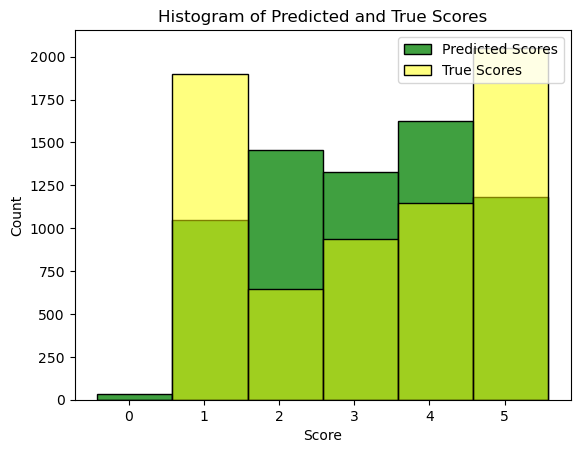

In [171]:
y_pred_embeddings = ridge.predict(xtest)

minv = min(y_test.min(), y_pred_embeddings.min())
maxv = max(y_test.max(), y_pred_embeddings.max())
bins = np.arange(minv, maxv + 1) - 0.5

sns.histplot(y_pred_embeddings, bins=bins, color='green', label='Predicted Scores')
sns.histplot(y_test, bins=bins, color='yellow', alpha=0.5, label='True Scores')

plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Histogram of Predicted and True Scores')
plt.legend()
plt.show()

In [172]:
def calculate_sentiment(score):
    if score >= 4:
        return "Positive"
    elif score > 2:
        return "Neutral"
    elif score <= 2:
        return "Negative"
    else:
        return "Invalid Score"

def get_test_review(review):
    test_data = pd.DataFrame({
        'review': [review],
    }, index=[99999])
    test_data = test_data.reset_index().rename(columns={'index': 'reviewer_id'})
    test_data_f = test_data['review']
    review = embed(test_data_f)
    review_score = ridge.predict(review)[0]
    review_sentiment = calculate_sentiment(review_score)
    return [review_score, review_sentiment]

review = "I loved the nuggets"
print(get_test_review(review))

review = "I liked the nuggets"
print(get_test_review(review))

review = "Meh"
print(get_test_review(review))

review = "I did not like the nuggets"
print(get_test_review(review))

review = "I did not like the nuggets. Terrible service."
print(get_test_review(review))


[4.695928010276442, 'Positive']
[4.499778534064294, 'Positive']
[2.4302929321993174, 'Neutral']
[2.310269799202817, 'Neutral']
[1.669609359166985, 'Negative']


## Can this be improved by using a Bayesian model?

In [173]:
from sklearn.linear_model import BayesianRidge

bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(xtrain, y_train)

r2_score_bayesian = bayesian_ridge.score(xtest, y_test)
print("R2 Score: ", r2_score_bayesian)



R2 Score:  0.677116080155275


```
This score is slightly better than the linear regression R2 score. 
Ridge r2 was 0.6741589814649641
BayesianRidge r2 was 0.674227346399676
The difference in predictive performance between the two models is negligible.
```

## Geolocation

In [174]:
# Grouping by state and calculating the mean rating
state_ratings = df.groupby('state')['rating_int'].mean().reset_index()
# Sorting the states by mean rating
state_ratings_sorted = state_ratings.sort_values(by='rating_int', ascending=False)
print(state_ratings_sorted)

      state  rating_int
11       VA    3.697674
1        DC    3.594436
7        PA    3.463035
10  Unknown    3.383333
3        IL    3.362184
6        NY    3.299466
4        NJ    3.255710
0        CA    3.191455
8        TX    3.155415
5        NV    2.978641
2        FL    2.867514
9        UT    2.525843


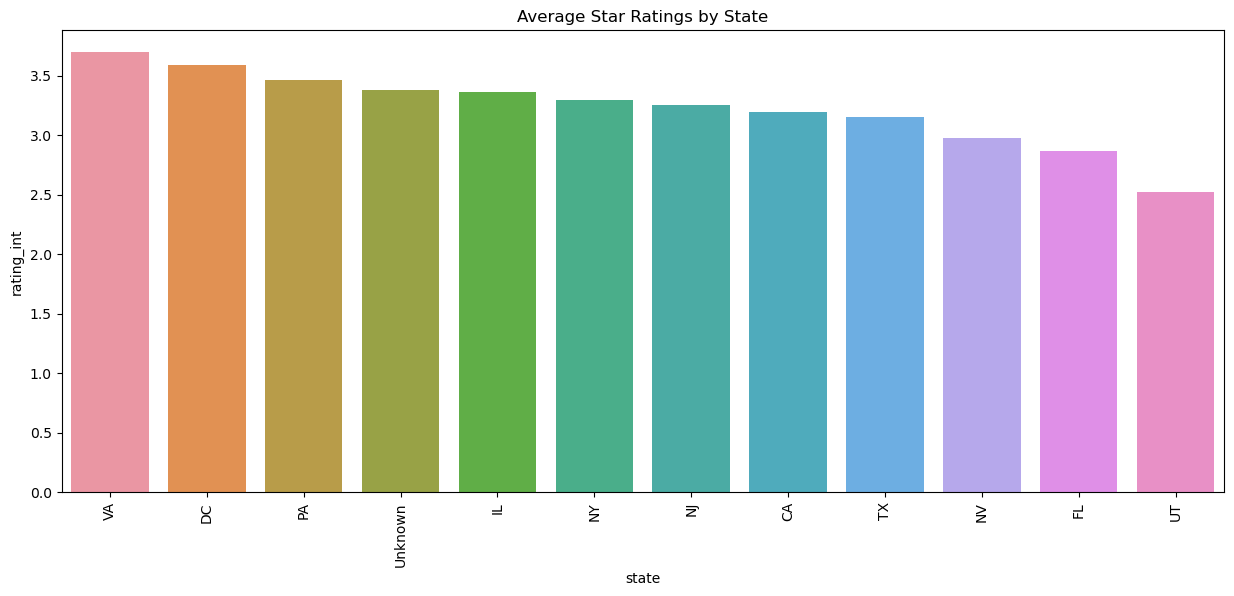

In [175]:
plt.figure(figsize=(15, 6))
sns.barplot(x='state', y='rating_int', data=state_ratings_sorted)
plt.xticks(rotation=90)
plt.title('Average Star Ratings by State')
plt.show()